# Dimensionality Reduction 

The aim of this project was to examine differ ways to reduce dimensionality in high dimension sets, in this case the MNIST handwritten digit database. Dimensionality reduction is implemented to lessen the sets complexity without losing variance. This allows faster model training and the ability to visualise clusters. This project used both principal component analysis (PCA) and t-distributed stochastic neighbour (TSNE) embedding. To visualisations were made in 2D and 3D and models were compared on the original and reduce data sets.

| Model                   | Xgboost  |   | SVC      |   | Random Forest |   | KNeighbors |   | Average  |
|-------------------------|----------|---|----------|---|---------------|---|------------|---|----------|
| Time Reduction          | 92.43159 |   | 91.86185 |   | 79.45173      |   | 92.51669   |   | 89.06547 |
| Loss / Gain in Accuracy | -1.06829 |   | 13.48592 |   | -2.66517      |   | 0.620664   |   | 2.59328  |

Models improved in speed by an average of 89.07% and interesting overall the model maintained roughly the same level of accuracy, ranging from 2.67% less to 13.49% more.


In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

y_train = train.label
X_train =train.drop('label', axis=1)

In [35]:
train2 = train[0:3000]
y_train = train2.label
X_train =train2.drop('label', axis=1)

pca = PCA(n_components=0.95)
X2D = pca.fit_transform(X_train)
X_train = pd.DataFrame(X2D)

## Cumsum visualisation of PCA

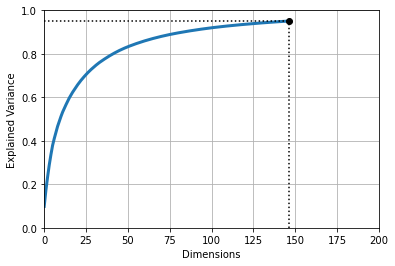

In [37]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 200, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")

plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

In [6]:
X_tsne = X_train[0:3000]
y_tsne =  y_train[0:3000]
tsne = TSNE(n_components=2, random_state=0)
X_reduced = tsne.fit_transform(X_tsne)

## Different Ways to Visualise Dimension Reduction in 2D

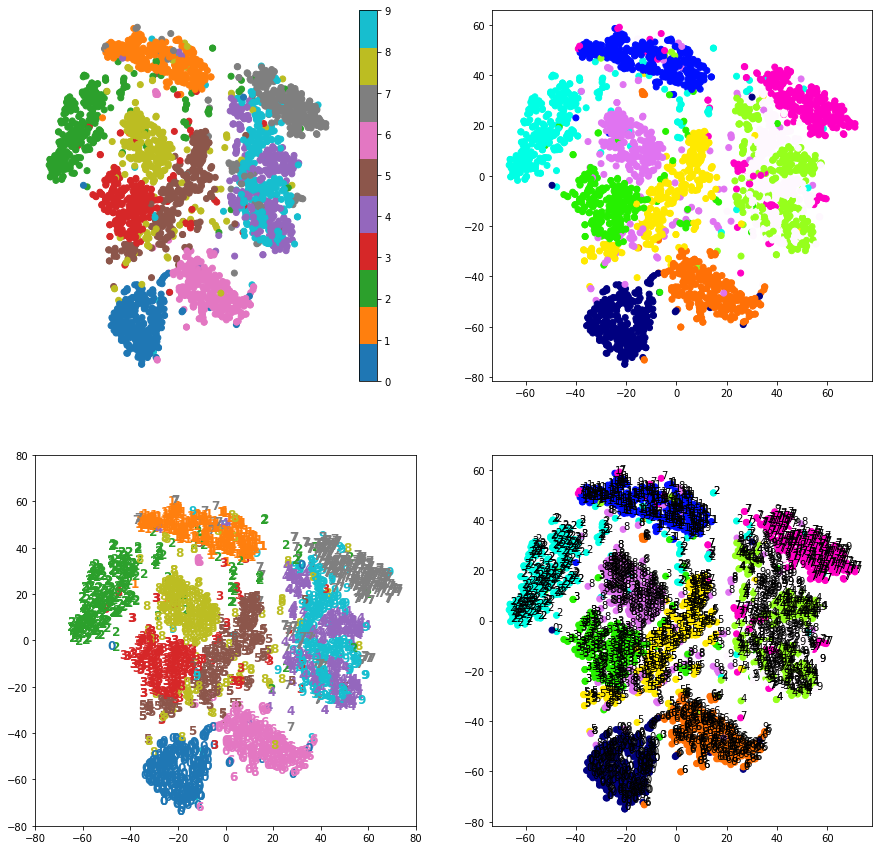

In [30]:
plt.figure(figsize=(15,15))

#using colour bars 
plt.subplot(2,2,1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_tsne, cmap="tab10")
plt.axis('off')
plt.colorbar()

#simple contrasting colours
plt.subplot(2,2,2)
cmap = plt.cm.get_cmap("gist_ncar")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_tsne, cmap="gist_ncar")

#using the numbers as markers
plt.subplot(2,2,3)
plt.axis([-80, 80, -80, 80])
cmap = plt.cm.get_cmap("tab10")
for index, image_coord in enumerate(X_reduced):
    plt.text(image_coord[0], image_coord[1], y_tsne[index], color=cmap(y_tsne[index] / 9), fontsize='large',          fontweight='extra bold', fontfamily='aharoni')

#labled markers
plt.subplot(2,2,4)
cmap = plt.cm.get_cmap("gist_ncar")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_tsne, cmap="gist_ncar")
for index, image_coord in enumerate(X_reduced):
    plt.text(image_coord[0], image_coord[1], y_tsne[index])

plt.show()

## Visualising in 3D using TSNE.

In [18]:
tsne = TSNE(n_components=3, random_state=0)
X_red_3 = tsne.fit_transform(X_tsne)

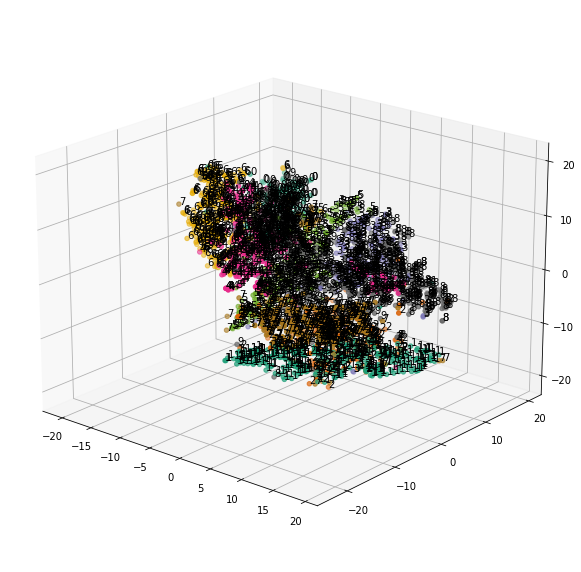

In [38]:
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_red_3[:,0], X_red_3[:,1], X_red_3[:,2], c=y_tsne, cmap="Dark2")
for index, image_coord in enumerate(X_red_3):
    ax.text(image_coord[0], image_coord[1],image_coord[2], y_tsne[index])
ax.view_init(20, -50)
plt.show()

## Comparing Model with and without Reduced Sets 

| Model                   | Xgboost  |   | SVC      |   | Random Forest |   | KNeighbors |   | Average  |
|-------------------------|----------|---|----------|---|---------------|---|------------|---|----------|
| Time Reduction          | 92.43159 |   | 91.86185 |   | 79.45173      |   | 92.51669   |   | 89.06547 |
| Loss / Gain in Accuracy | -1.06829 |   | 13.48592 |   | -2.66517      |   | 0.620664   |   | 2.59328  |

In [46]:
#1.XGBoost without reduced set 
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)


start = time.time()
cv = cross_val_score(XGBC, X_train, y_train, cv=5, n_jobs=-1)
stop = time.time()
print(f"Training time: {stop - start}s")
print ("CV=", cv)
print ("CV mean=", cv.mean())

Training time: 51.76797842979431s
CV= [0.87166667 0.87833333 0.88833333 0.86333333 0.86666667]
CV mean= 0.8736666666666666


In [58]:
#1.XGBoost with reduced set(PCA:95% of original set)
X_reduced
xgbc = XGBClassifier()
xgbc.fit(X_reduced, y_train)

start = time.time()
cv = cross_val_score(xgbc, X_reduced, y_train, cv=5, n_jobs=-1)
stop = time.time()
print(f"Training time: {stop - start}s")
print ("CV=", cv)
print ("CV mean=", cv.mean())

Training time: 1.2760727405548096s
CV= [0.89       0.86166667 0.875      0.89166667 0.89666667]
CV mean= 0.883


In [48]:
#2.Support Vector Classifier without reduced set 
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train,y_train)

start = time.time()
cv = cross_val_score(svc,X_train, y_train, cv=5, n_jobs=-1)
stop = time.time()
print(f"Training time: {stop - start}s")
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Training time: 7.643007755279541s
Cross val: [0.94166667 0.95333333 0.94       0.95       0.94833333]
Cross val mean: 0.9466666666666667


In [49]:
#2.Support Vector Classifier with reduced set(PCA:95% of original set)
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_reduced,y_train)

start = time.time()
cv = cross_val_score(svc,X_reduced, y_train, cv=5, n_jobs=-1)
stop = time.time()
print(f"Training time: {stop - start}s")
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Training time: 0.6219992637634277s
Cross val: [0.815      0.815      0.80166667 0.82666667 0.83666667]
Cross val mean: 0.819


In [50]:
#3.Random Forest without reduced set 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

start = time.time()
cv = cross_val_score(rf,X_train, y_train,cv=5, n_jobs=-1)
stop = time.time()
print(f"Training time: {stop - start}s")
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Training time: 3.976078510284424s
Cross val: [0.89       0.895      0.89333333 0.87       0.89166667]
Cross val mean: 0.8880000000000001


In [51]:
#3.Random Forest with reduced set(PCA:95% of original set)
rf = RandomForestClassifier(random_state=0)
rf.fit(X_reduced,y_train)

start = time.time()
cv = cross_val_score(rf, X_reduced, y_train,cv=5, n_jobs=-1)
stop = time.time()
print(f"Training time: {stop - start}s")
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Training time: 0.8170151710510254s
Cross val: [0.91       0.905      0.90833333 0.91333333 0.92166667]
Cross val mean: 0.9116666666666667


In [52]:
#4.KNeighborsClassifier without reduced set 
KNei = KNeighborsClassifier()
KNei.fit(X_train,y_train)

start = time.time()
cv = cross_val_score(KNei, X_train, y_train,cv=5, n_jobs=-1)
stop = time.time()
print(f"Training time: {stop - start}s")
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Training time: 1.5370056629180908s
Cross val: [0.91166667 0.91166667 0.91       0.91333333 0.91833333]
Cross val mean: 0.9129999999999999


In [53]:
#4.KNeighborsClassifier with reduced set(PCA:95% of original set)
KNei = KNeighborsClassifier()
KNei.fit(X_reduced,y_train)

start = time.time()
cv = cross_val_score(KNei, X_reduced, y_train,cv=5, n_jobs=-1)
stop = time.time()
print(f"Training time: {stop - start}s")
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Training time: 0.11501884460449219s
Cross val: [0.90833333 0.89166667 0.905      0.91333333 0.91833333]
Cross val mean: 0.9073333333333332
